In [1]:
import pandas as pd
import ipywidgets as widgets
import base64

In [2]:
# reading csv
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ITLYTy36uuZTALDX42jZiCTn8LZV-YEj')

In [3]:
df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
...,...,...,...,...,...,...,...
29099,TO,9219390289657798803,S,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29100,TO,9219390289657798803,XL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29101,TO,9219390289657798803,XS,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29102,TO,9219390289657798803,XXL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...


# Subselecting by group characteristic
We are going to select only the rows whose item id has a total sum stock quantity < 5.

In order to do that we'll need to work out which item ids satisfy that condition and then use the item ids to filter the actual dataframe.

In [4]:
item_tot_stock = df.groupby('item_id').stock_quantity.sum()
item_tot_stock

item_id
-9211454783299887107      0
-9196712795451291394      0
-9195690731018983398      0
-9193583659629675556      0
-9191417078785560471      0
                       ... 
 9203047692451691870      0
 9203722658108695210    311
 9204604016320963459    131
 9217331469375676294    169
 9219390289657798803      2
Name: stock_quantity, Length: 3121, dtype: int64

In [5]:
item_tot_stock<5

item_id
-9211454783299887107     True
-9196712795451291394     True
-9195690731018983398     True
-9193583659629675556     True
-9191417078785560471     True
                        ...  
 9203047692451691870     True
 9203722658108695210    False
 9204604016320963459    False
 9217331469375676294    False
 9219390289657798803     True
Name: stock_quantity, Length: 3121, dtype: bool

In [6]:
item_tot_stock[item_tot_stock<5]

item_id
-9211454783299887107    0
-9196712795451291394    0
-9195690731018983398    0
-9193583659629675556    0
-9191417078785560471    0
                       ..
 9171242694638783940    2
 9195293150087703907    0
 9200763438426804191    0
 9203047692451691870    0
 9219390289657798803    2
Name: stock_quantity, Length: 1767, dtype: int64

In [7]:
low_stock_items = item_tot_stock[item_tot_stock<5].index
low_stock_items

Int64Index([-9211454783299887107, -9196712795451291394, -9195690731018983398,
            -9193583659629675556, -9191417078785560471, -9186786591870444796,
            -9180495518760579244, -9163679137772189306, -9148411514774668682,
            -9147610867401757543,
            ...
             9147821294843958734,  9153607217089266001,  9160519113061011451,
             9161396202393900812,  9162311958422134074,  9171242694638783940,
             9195293150087703907,  9200763438426804191,  9203047692451691870,
             9219390289657798803],
           dtype='int64', name='item_id', length=1767)

In [9]:
mask = df['item_id'].isin(low_stock_items)
low_stock_df = df[mask]
low_stock_df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
...,...,...,...,...,...,...,...
29099,TO,9219390289657798803,S,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29100,TO,9219390289657798803,XL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29101,TO,9219390289657798803,XS,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...
29102,TO,9219390289657798803,XXL,PRUNE,7.99,0,https://picsum.photos/seed/9219390289657798803...


# Creating the User Interface (UI)

In [12]:
for item_id, sub_df in low_stock_df.groupby('item_id'):
  break

# sub_df

,category,item_id,size,color_long,price,stock_quantity,image
0,JK,-9211454783299887107,L,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
1,JK,-9211454783299887107,M,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
2,JK,-9211454783299887107,XL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
3,JK,-9211454783299887107,XXL,AQUA,19.99,0,https://picsum.photos/seed/-921145478329988710...
4,JK,-9211454783299887107,L,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
5,JK,-9211454783299887107,M,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
6,JK,-9211454783299887107,S,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
7,JK,-9211454783299887107,XL,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
8,JK,-9211454783299887107,XS,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...
9,JK,-9211454783299887107,XXL,AUBERGINE,19.99,0,https://picsum.photos/seed/-921145478329988710...


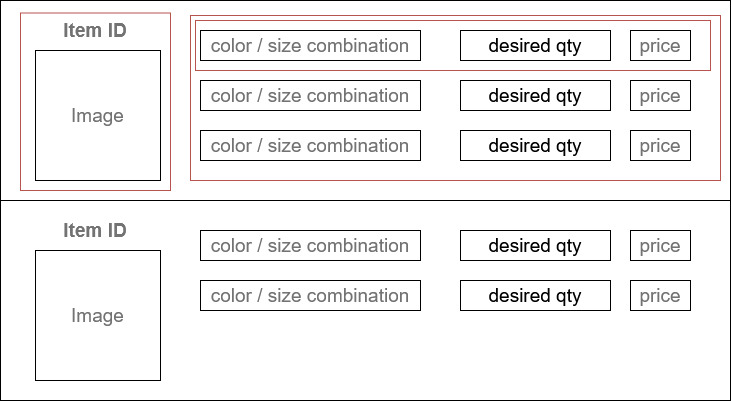

In [19]:
mydict = {'a':'agergae', 'n': 7}
for a,b in mydict.items():
  break

a

'a'

In [20]:
b

'agergae'

In [14]:
def render_boxes_content(item_group):
    item_id = item_group.item_id.iloc[0]  # first (all the same)
    image_url = item_group.image.iloc[0]  # first (all the same)
    
    # left column
    col1_html = f'<h1>{item_id}</h1><br><img src="{image_url}"></img>'
    column1 = widgets.HTML(col1_html)

    # right column
    col2_rows = []
    for _, row in item_group.iterrows():
        name = f"{row.category} {row.color_long} {row['size']}"
        col2_row = widgets.HBox([
          widgets.Label(name), 
          widgets.IntText(row.stock_quantity),
          widgets.Label(str(row.price)),
        ])
        col2_rows.append(col2_row)

    column2 = widgets.VBox(col2_rows, layout=widgets.Layout(padding='30px'))

    # combining both
    return widgets.HBox([column1, column2])

render_boxes_content(sub_df)

In [ ]:
class InventoryDashboard:
    def __init__(self, df):
        self.df = df.copy()
        self.out = widgets.Output()
        display(self.out)
        self.start_idx = 0
        self.page_step = 2
        self.boxes = []
        
        self.define_header()
        self.render()
        
    def get_n_group(self, n):
        item_id = self.df.item_id.unique()[n]
        return self.df.groupby('item_id').get_group(item_id)
        
    def store_values(self):
        for box in dash.boxes:
            values = []
            for row in box.children[1].children:
                values.append(row.children[1].value)
            self.df.loc[box.idx, 'stock_quantity'] = values

    def define_header(self):
        prev_btn = widgets.Button(description="Prev")
        next_btn = widgets.Button(description="Next")
        export_btn = widgets.Button(description="Export Order", button_style='danger')
        page_idx_lbl = widgets.Label(f"{self.start_idx} - {self.start_idx+self.page_step}")

        def _prev(b):
            self.store_values()
            self.start_idx -= self.page_step
            if self.start_idx < 0: 
                self.start_idx = 0
            page_idx_lbl.value = f"{self.start_idx} - {self.start_idx+self.page_step}"
            self.render()
        def _next(b):
            self.store_values()
            self.start_idx += self.page_step
            page_idx_lbl.value = f"{self.start_idx} - {self.start_idx+self.page_step}"
            self.render()
        def _export(b):
            self.store_values()
            self.create_download_url()

        prev_btn.on_click(_prev)
        next_btn.on_click(_next)
        export_btn.on_click(_export)
        self.header = widgets.HBox([prev_btn, next_btn, export_btn, page_idx_lbl])

    def get_rows(self):
        self.boxes = []
        for n in range(self.start_idx, self.start_idx+self.page_step):
            item_group = self.get_n_group(n)
            box = render_boxes_content(item_group)
            box.idx = item_group.index
            self.boxes.append(box)

        vbox_content = [self.header] + self.boxes
        return widgets.VBox(vbox_content)

    def render(self):
        self.out.clear_output(wait=True)
        with self.out:
            display(self.get_rows())
            
    def create_download_url(self):
        self.out.clear_output(wait=True)
        dwld = widgets.HTML(value='')
        
        fp = 'export.csv'
        self.df.to_csv(fp)
        
        with open(fp, "rb") as f:
            data = f.read()
        b64 = base64.b64encode(data)
        payload = b64.decode()

        dwld.value = f'<a download="{fp}" href="data:text/csv;base64,{payload}" target="_blank">Click here to download</a>'
        
        with self.out:
            display(dwld)

In [ ]:
dash = InventoryDashboard(df=low_stock_df)

Output()